# TF2.0---CNN变体网络

In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.0.0-alpha0


## 1. 载入数据

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape((-1,28,28,1))
x_test = x_test.reshape((-1,28,28,1))

print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)

(60000, 28, 28, 1)   (60000,)
(10000, 28, 28, 1)   (10000,)


## 2. 简单的深度网络
*×比如:AlexNet/VggNet×*

In [3]:
x_shape  = x_train.shape
deep_model = keras.Sequential(
[
    layers.Conv2D(input_shape=((x_shape[1], x_shape[2], x_shape[3])),
                 filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
    
])

In [4]:
deep_model.compile(optimizer=keras.optimizers.Adam(),
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])
deep_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

In [5]:
history = deep_model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 75s 1ms/sample - loss: 0.3581 - accuracy: 0.8982 - val_loss: 0.0638 - val_accuracy: 0.9823
Epoch 2/5
54000/54000 [==============================] - 69s 1ms/sample - loss: 0.0616 - accuracy: 0.9807 - val_loss: 0.0566 - val_accuracy: 0.9833
Epoch 3/5
54000/54000 [==============================] - 67s 1ms/sample - loss: 0.0411 - accuracy: 0.9873 - val_loss: 0.0468 - val_accuracy: 0.9892
Epoch 4/5
54000/54000 [==============================] - 66s 1ms/sample - loss: 0.0346 - accuracy: 0.9889 - val_loss: 0.0393 - val_accuracy: 0.9887
Epoch 5/5
54000/54000 [==============================] - 66s 1ms/sample - loss: 0.0299 - accuracy: 0.9901 - val_loss: 0.0387 - val_accuracy: 0.9888


In [6]:
result = deep_model.evaluate(x_test, y_test)
print(result)

10000/10000 [==============================] - 2s 231us/sample - loss: 0.0330 - accuracy: 0.9890
[0.033038407155007006, 0.989]


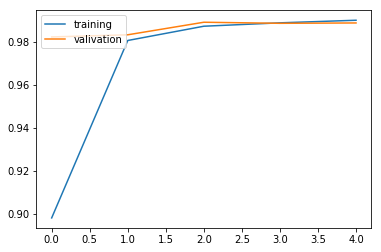

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()

## 3. 添加了其他功能层的深度卷积

In [9]:
x_shape = x_train.shape
deep_model = keras.Sequential(
[
    layers.Conv2D(input_shape=(x_shape[1], x_shape[2], x_shape[3]),
                 filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

In [11]:
deep_model.compile(optimizer=keras.optimizers.Adam(),
                  loss=keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy']
                  )
deep_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_v2 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_v2_1 (Ba (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
batch_normalization_v2_2 (Ba (None, 14, 14, 32)       

In [12]:
history = deep_model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.1, verbose=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 102s 2ms/sample - loss: 0.3086 - accuracy: 0.9006 - val_loss: 0.0570 - val_accuracy: 0.9850
Epoch 2/5
54000/54000 [==============================] - 101s 2ms/sample - loss: 0.1275 - accuracy: 0.9586 - val_loss: 0.0396 - val_accuracy: 0.9880
Epoch 3/5
54000/54000 [==============================] - 99s 2ms/sample - loss: 0.0991 - accuracy: 0.9672 - val_loss: 0.0357 - val_accuracy: 0.9898
Epoch 4/5
54000/54000 [==============================] - 102s 2ms/sample - loss: 0.0816 - accuracy: 0.9736 - val_loss: 0.0352 - val_accuracy: 0.9912
Epoch 5/5
54000/54000 [==============================] - 103s 2ms/sample - loss: 0.0652 - accuracy: 0.9779 - val_loss: 0.0421 - val_accuracy: 0.9897


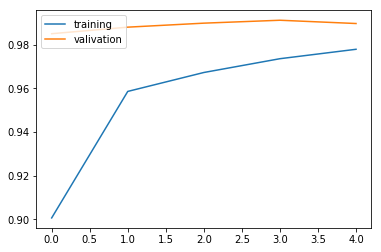

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()

In [14]:
result = deep_model.evaluate(x_test, y_test)
print(result)

10000/10000 [==============================] - 4s 355us/sample - loss: 0.0327 - accuracy: 0.9895
[0.032723097464763484, 0.9895]


## 4. NIN网络
> 即“网络中的网络（NIN）”或“1X1卷积” 方法很简单 - 在其他卷积层之后添加卷积层 **具有降低图像空间的维度（深度）的效果，有效地减少了参数的数量** 

In [15]:
x_shape  = x_train.shape
deep_model = keras.Sequential(
[
    layers.Conv2D(input_shape=((x_shape[1], x_shape[2], x_shape[3])),
                 filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=16, kernel_size=(1,1), strides=(1,1), padding='valid', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=16, kernel_size=(1,1), strides=(1,1), padding='valid', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
    
])

In [16]:
deep_model.compile(optimizer=keras.optimizers.Adam(),
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])
deep_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_v2_4 (Ba (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 16)        528       
_________________________________________________________________
batch_normalization_v2_5 (Ba (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
batch_normalization_v2_6 (Ba (None, 14, 14, 32)       

In [18]:
history = deep_model.fit(x_train, y_train, batch_size=256, epochs=5, validation_split=0.1, verbose=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 48s 894us/sample - loss: 0.5643 - accuracy: 0.8190 - val_loss: 0.1048 - val_accuracy: 0.9667
Epoch 2/5
54000/54000 [==============================] - 49s 899us/sample - loss: 0.1384 - accuracy: 0.9580 - val_loss: 0.0511 - val_accuracy: 0.9863
Epoch 3/5
54000/54000 [==============================] - 48s 893us/sample - loss: 0.0908 - accuracy: 0.9728 - val_loss: 0.0459 - val_accuracy: 0.9867
Epoch 4/5
54000/54000 [==============================] - 53s 989us/sample - loss: 0.0703 - accuracy: 0.9789 - val_loss: 0.0391 - val_accuracy: 0.9890
Epoch 5/5
54000/54000 [==============================] - 48s 894us/sample - loss: 0.0601 - accuracy: 0.9818 - val_loss: 0.0518 - val_accuracy: 0.9855


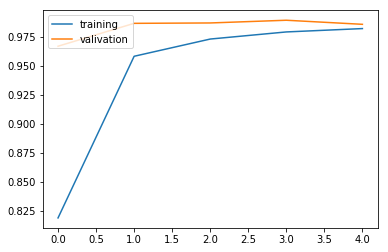

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()

In [22]:
result = deep_model.evaluate(x_test, y_test)
print(result)
print(deep_model.metrics_names)

10000/10000 [==============================] - 2s 223us/sample - loss: 0.0576 - accuracy: 0.9812
[0.05763076730745379, 0.9812]
['loss', 'accuracy']
